In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats

In [2]:
df = pd.read_csv('flights_NY.csv')
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


# Задание 1. В каких колонках есть пропущенные значения? Сколько строк, в которых есть хотя бы одно пропущенное значение? Есть ли какая-то особенность в тех рейсах, в которых есть пропущенные значения? Удалите строки, в которых есть хотя бы одно пропущенное значение из дальнейшего анализа.


In [3]:
df.isnull().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
dtype: int64

In [4]:
df.isnull().sum (axis= 1 )

0         0
1         0
2         0
3         0
4         0
         ..
336771    6
336772    6
336773    5
336774    5
336775    5
Length: 336776, dtype: int64

Считаем количество строк с пустыми значениями вычитая из всех строк строки возвращаемые dropna()

In [5]:
df.shape[0] - df.dropna().shape[0]

9430

In [6]:
df[df.isnull().any(axis=1)==True]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
471,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147
477,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872
615,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147
643,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425
725,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


air_time и arr_delay отсутсвуют вместе, 
dep_time и dep_delay отсутсвуют вместе - таким образом мы не учитываем самолеты, вылет которых был отменен. Однако air time отсутсвует иногда даже не смотря на присутсвие значений dep_time и arr_time

In [7]:
df = df.dropna()

In [8]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


# 2. Постройте в одних осях нормированные гистограммы времени задержки вылета и прилета. Ограничьте диапазон построения гистограмм, чтобы избавиться от выбросов, и опишите характер выбросов (количество и значения). Есть ли другие особенности в полученных распределениях?

array([[<AxesSubplot:title={'center':'arr_delay'}>,
        <AxesSubplot:title={'center':'dep_delay'}>]], dtype=object)

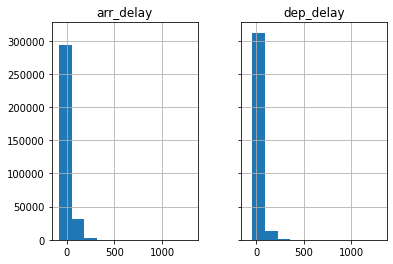

In [9]:
df.hist(column=['arr_delay','dep_delay'],sharex=True,sharey=True)

[Text(0.5, 0, 'minutes')]

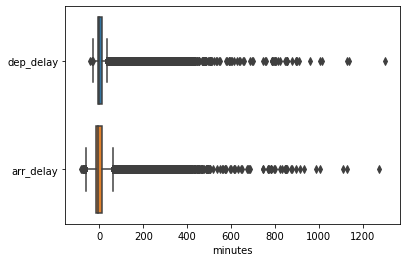

In [10]:
sns.boxplot(data=df[['dep_delay', 'arr_delay']],orient='h').set(xlabel='minutes')

In [11]:
def cuteBoxplot(data):
    return sns.boxplot(
    data=data,
    notch=True, showcaps=False,orient='h',
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
    )

[Text(0.5, 0, 'minutes')]

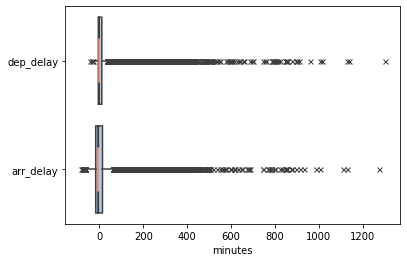

In [12]:
cuteBoxplot(df[['dep_delay', 'arr_delay']]).set(xlabel='minutes')

Значение выбросов довольно велико, особенно в сторону задержки рейса, что сразу наталкивает на  мысль о ненормальности распределения.

Будем сначала определять выбросы простым способом - по zscore. Выбросим эти значения

<AxesSubplot:>

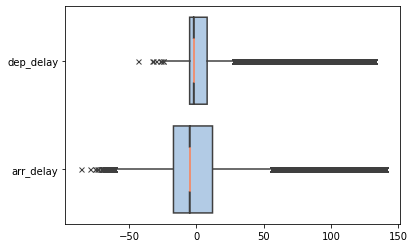

In [13]:
cuteBoxplot(df[(np.abs(stats.zscore(df['dep_delay'])) < 3) & (np.abs(stats.zscore(df['arr_delay'])) < 3)][['dep_delay', 'arr_delay']])

Проверим гипотезу о нормальности распределения.

Нулевой гипотезой будет гипотеза о нормальности, проверим ее по критерию Пирсона.

In [14]:
_,p_value = stats.normaltest(df[['dep_delay', 'arr_delay']])
print('dep_delay:', p_value[0])
print('arr_delay:', p_value[1])

dep_delay: 0.0
arr_delay: 0.0


((array([-4.59950566, -4.41120631, -4.30913585, ...,  4.30913585,
          4.41120631,  4.59950566]),
  array([ -86.,  -79.,  -75., ..., 1109., 1127., 1272.])),
 (37.36268503382764, 6.8953767573148905, 0.8370925028585481))

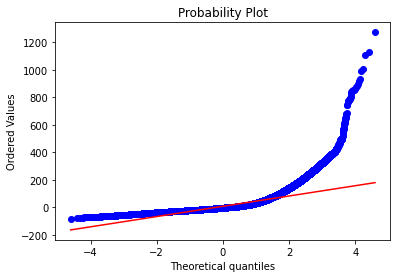

In [15]:
stats.probplot(df['arr_delay'],dist='norm',plot=plt)

((array([-4.59950566, -4.41120631, -4.30913585, ...,  4.30913585,
          4.41120631,  4.59950566]),
  array([ -43.,  -33.,  -32., ..., 1126., 1137., 1301.])),
 (28.900719513266072, 12.555155706805643, 0.7213239386751873))

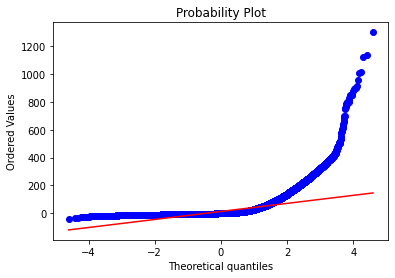

In [16]:
stats.probplot(df['dep_delay'],dist='norm',plot=plt)

Таким образом распределение ненормальное. 

Вообще говоря значения, которые мы отбросили до этого, таким образом не являются выбросами, а само распределение не нормально. Для отсеивания выбросов теперь можно использовать Interquartile Range или IQR

In [17]:
q_low = df["arr_delay"].quantile(0.01)
q_hi  = df["arr_delay"].quantile(0.99)

df_filtered = df[(df["arr_delay"] < q_hi) & (df["arr_delay"] > q_low)]

In [18]:
q_low = df_filtered["dep_delay"].quantile(0.01)
q_hi  = df_filtered["dep_delay"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["dep_delay"] < q_hi) & (df_filtered["dep_delay"] > q_low)]

Построим boxplot для отфильтрованной таблицы.

<AxesSubplot:>

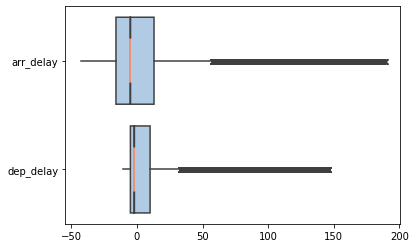

In [19]:
cuteBoxplot(df_filtered[['arr_delay','dep_delay']])

Наше распределение смещенно вправо, посмотрим на графики уже отфильтрованной таблицы и например с функцией Gumbel distribution

((array([-2.56668542, -2.49615934, -2.45696372, ..., 11.66932213,
         12.13579214, 13.02258736]),
  array([-43., -43., -43., ..., 189., 189., 189.])),
 (24.54886320680841, -10.621080761500922, 0.9809931841872302))

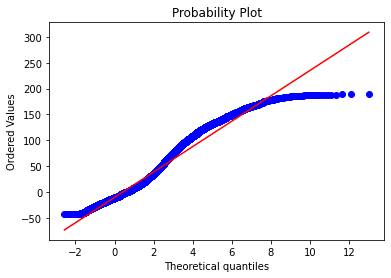

In [20]:
stats.probplot(df_filtered['arr_delay'],dist='gumbel_r',plot=plt)

((array([-2.56668542, -2.49615934, -2.45696372, ..., 11.66932213,
         12.13579214, 13.02258736]),
  array([-11., -11., -11., ..., 146., 146., 146.])),
 (18.684073274438948, -1.916783173037821, 0.9131708783959847))

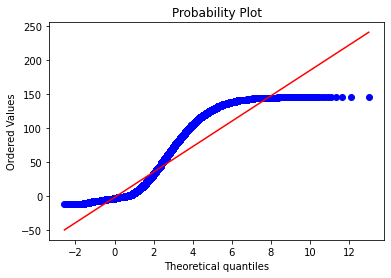

In [21]:
stats.probplot(df_filtered['dep_delay'],dist='gumbel_r',plot=plt)

Опять же, согласно проведенному анализу и критерию Пирсона в дальнейшем анализе мы будем предполагать, что наше распределение ненормальное.

# 3. Оцените среднее значение, медиану и величину стандартного отклонения для времени задержки вылета и времени задержки прилета.

In [22]:
df[['arr_delay','dep_delay']].describe()

,arr_delay,dep_delay
count,327346.000000,327346.000000
mean,6.895377,12.555156
std,44.633292,40.065688
min,-86.000000,-43.000000
25%,-17.000000,-5.000000
50%,-5.000000,-2.000000
75%,14.000000,11.000000
max,1272.000000,1301.000000


Сравним со значениями, которые мы получили бы при фильтрации 

In [23]:
df_filtered[['arr_delay','dep_delay']].describe()

,arr_delay,dep_delay
count,313663.000000,313663.000000
mean,3.548732,8.867823
std,32.093797,26.240688
min,-43.000000,-11.000000
25%,-16.000000,-5.000000
50%,-5.000000,-2.000000
75%,13.000000,10.000000
max,189.000000,146.000000


# 4. Отсортируйте авиакомпании по величине средней задержки вылета и приведите среднюю задержку вылета вместе с 95%-доверительным интервалом по каждой авиакомпании. Результат представьте в виде графика.


In [24]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [25]:
carrier_df = df.groupby(['carrier'])['dep_delay'].mean().sort_values()
carrier_df

carrier
US     3.744693
HA     4.900585
AS     5.830748
AA     8.569130
DL     9.223950
MQ    10.445381
UA    12.016908
OO    12.586207
VX    12.756646
B6    12.967548
9E    16.439574
WN    17.661657
FL    18.605984
YV    18.898897
EV    19.838929
F9    20.201175
Name: dep_delay, dtype: float64

In [26]:
df.groupby(['carrier'])['dep_delay'].std()

# carrier_df['sigma_dep_delay'] =

carrier
9E    45.487513
AA    37.365267
AS    31.426798
B6    38.380215
DL    39.656296
EV    46.446174
F9    58.404339
FL    52.491059
HA    74.109901
MQ    39.025198
OO    43.065994
UA    35.547921
US    27.939106
VX    44.016255
WN    43.237454
YV    49.164838
Name: dep_delay, dtype: float64

Функция, которая подсчитывает доверительный интервал для среднего строки

In [28]:
def interval(a):
    return stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))

In [29]:
interval(df[df['carrier']=='US']['dep_delay'].to_numpy())

(3.3558133730699975, 4.133571932764302)

Создадим список компаний отсортированный по среднему значению задержки 

In [36]:
order = [car for car, _ in df.groupby(['carrier'])['dep_delay'].mean().sort_values().items() ]


In [37]:
order

['US',
 'HA',
 'AS',
 'AA',
 'DL',
 'MQ',
 'UA',
 'OO',
 'VX',
 'B6',
 '9E',
 'WN',
 'FL',
 'YV',
 'EV',
 'F9']

Воспользуемся готовой функцией для вывода значений с доверительным интервалом

<AxesSubplot:xlabel='carrier', ylabel='dep_delay'>

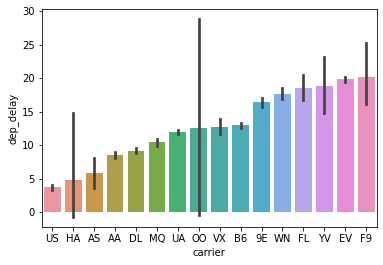

In [38]:
sns.barplot(x = "carrier",
            y = "dep_delay",
            data = df,
            order = order,
            errorbar=("ci", 95)
            )

Наибольшие значения доверительных интервалов соответсвуют компаниям с наименьшим количеством вылетов, так у 'OO' их всего 29 вылетов.

# 5. Значимо ли различие в среднем времени задержки вылета для авиакомпаний American Airlines (AA) и Delta Airlines (DL)? На каком уровне значимости можно отвергнуть гипотезу о равенстве средних?

Отобразим отдельно бары для этих компаний

<AxesSubplot:xlabel='carrier', ylabel='dep_delay'>

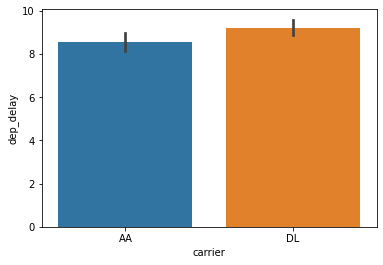

In [55]:
sns.barplot(x = "carrier",
            y = "dep_delay",
            data = df.loc[(df['carrier']=='AA') | (df['carrier']=='DL')],
            errorbar=("ci", 95)
            )

Будем использовать t-test для нулевой гипотезы "средние в задержке для авиакомпаний равны"

In [56]:
stats.ttest_ind(df[df['carrier']=='AA']['dep_delay'], df[df['carrier']=='DL']['dep_delay'])

Ttest_indResult(statistic=-2.3368324651397754, pvalue=0.019450363520510508)

Так как р меньше 0.05 мы отвергаем гипотезу о том, что средние не равны и, следовательно, различие значимо

# 6. Сравните между собой аэропорты вылета (JFK, LGA, EWR) с точки зрения статистики задержек вылетов. Являются ли различия статистически значимыми?

<AxesSubplot:xlabel='origin', ylabel='dep_delay'>

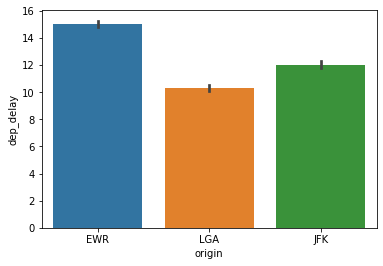

In [58]:
sns.barplot(x = "origin",
            y = "dep_delay",
            data = df.loc[(df['origin']=='JFK') | (df['origin']=='LGA') | (df['origin']=='EWR')],
            errorbar=("ci", 95)
            )

In [59]:
stats.ttest_ind(df[df['origin']=='JFK']['dep_delay'], df[df['origin']=='LGA']['dep_delay'])

Ttest_indResult(statistic=10.11183585425378, pvalue=4.9582451486320366e-24)

In [60]:
stats.ttest_ind(df[df['origin']=='EWR']['dep_delay'], df[df['origin']=='LGA']['dep_delay'])

Ttest_indResult(statistic=27.098525140528466, pvalue=1.9011910565531667e-161)

Так как р меньше 0.05 мы говорим, что различия в средних статистически значимы.

# 7. Каким распределением можно описать распределение времени задержки вылета в диапазоне, где время задержки вылета > 0? Предложите общий вид распределения и оцените его параметры. На одном рисунке изобразите гистограмму и график плотности аппроксимирующего распределения.

In [61]:
df.loc[df['dep_delay']>0]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
19,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,343,EWR,PBI,147.0,1023
25,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,3768,EWR,ORD,139.0,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336759,2013,9,30,2207.0,27.0,2257.0,7.0,MQ,N532MQ,3660,LGA,BNA,97.0,764
336760,2013,9,30,2211.0,72.0,2339.0,57.0,EV,N12145,4672,EWR,STL,120.0,872
336762,2013,9,30,2233.0,80.0,112.0,42.0,UA,N578UA,471,EWR,SFO,318.0,2565
336763,2013,9,30,2235.0,154.0,59.0,130.0,B6,N804JB,1083,JFK,MCO,123.0,944


<AxesSubplot:>

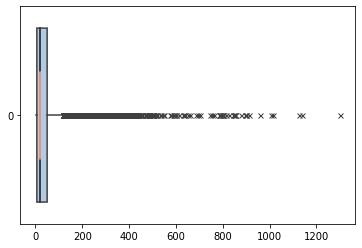

In [63]:
cuteBoxplot(df.loc[df['dep_delay']>0]['dep_delay'])

Построим гистограмму

<AxesSubplot:xlabel='dep_delay', ylabel='Count'>

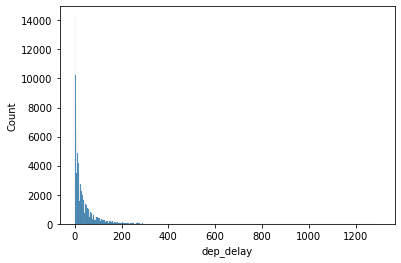

In [64]:
sns.histplot(df.loc[df['dep_delay']>0]['dep_delay'])

Построим гистограмму для отфильтрованной таблицы

<AxesSubplot:xlabel='dep_delay', ylabel='Count'>

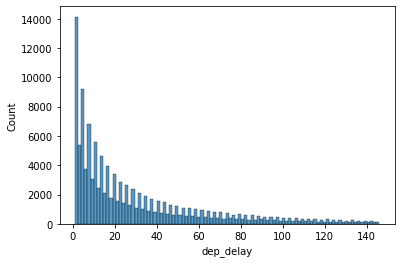

In [73]:
sns.histplot(df_filtered.loc[df_filtered['dep_delay']>0]['dep_delay'])

In [82]:
counts = [0]*147
for i in df_filtered.loc[df_filtered['dep_delay']>0]['dep_delay']:
    counts[int(i)]+=1

Попробуем аппроксимировать с помощью scipy.optimize.curve_fit

In [69]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [85]:
xdata = np.arange(1,147)

In [84]:
ydata = counts[1:]

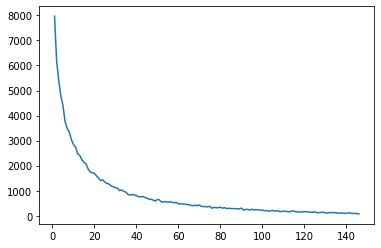

In [86]:
plt.plot(xdata,ydata)

In [87]:
popt, pcov = scipy.optimize.curve_fit(func, xdata, ydata)
popt

C:\Users\dimav\AppData\Local\Temp\ipykernel_14636\411350017.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


array([6.61017096e+03, 8.12392747e-02, 2.93145207e+02])

In [89]:
opty = [func(x,popt[0],popt[1],popt[2]) for x in xdata]

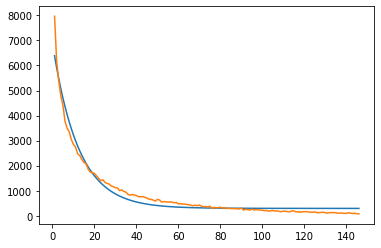

In [91]:
plt.plot(xdata,opty,  label = "fit")
plt.plot(xdata,ydata, label = "data")